## Repaso y algunas otras funciones útiles
- Pandas nos provee con muchas otras funciones para manipular nuestros datos.
- Entre estas tenemos las operaciones con Strings en forma vectorizada.
- Recordemos brevemente cómo se ve una operación vectorizada con Numpy

In [1]:
import pandas as pd
import numpy as np
from numpy import random

In [2]:
x = np.array(random.randint(10, size=10))
print(x)

[3 5 5 4 2 4 0 3 3 9]


In [3]:
x * 2

array([ 6, 10, 10,  8,  4,  8,  0,  6,  6, 18])

- Cuando queremos vectorizar operaciones sobre strings en numpy es un poco más verboso. Veamos un ejemplo

In [4]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

- Pero fallará si encuentra un valor vacío/None

In [5]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

### Pandas puede hacer uso de la función str para solventar esto

In [6]:
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [7]:
type(names[2])

NoneType

In [8]:
names = names.str.capitalize()
names

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [9]:
type(names[2])

NoneType

## Otros métodos vectorizados de manipulación de Strings similares a Python nativo

- Pandas provee los siguientes métodos vectorizados de manipulación
- Podemos acceder a estos métodos con el atributo `str`

`len()	lower()	translate()	islower()
ljust()	upper()	startswith()	isupper()
rjust()	find()	endswith()	isnumeric()
center()	rfind()	isalnum()	isdecimal()
zfill()	index()	isalpha()	split()
strip()	rindex()	isdigit()	rsplit()
rstrip()	capitalize()	isspace()	partition()
lstrip()	swapcase()	istitle()	rpartition()`

In [10]:
nombres = pd.Series(['Jon Doe', 'Juan Jose', 'Krysia Badilla', 'Ana Maria', 'Gerardo Rivera', 'Gloria Sanchez'])

In [11]:
nombres.str.lower()

0           jon doe
1         juan jose
2    krysia badilla
3         ana maria
4    gerardo rivera
5    gloria sanchez
dtype: object

In [12]:
nombres.str.len()

0     7
1     9
2    14
3     9
4    14
5    14
dtype: int64

In [13]:
nombres.str.startswith('J')

0     True
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [14]:
nombres.str.split()

0           [Jon, Doe]
1         [Juan, Jose]
2    [Krysia, Badilla]
3         [Ana, Maria]
4    [Gerardo, Rivera]
5    [Gloria, Sanchez]
dtype: object

## Operaciones utilizando Expresiones Regulares (Regular expressions)

- También podemos utilizar expresiones regulares para manipular vectorizadamente nuestros datos string.
`match()	Call re.match() on each element, returning a boolean.
extract()	Call re.match() on each element, returning matched groups as strings.
findall()	Call re.findall() on each element
replace()	Replace occurrences of pattern with some other string
contains()	Call re.search() on each element, returning a boolean
count()	Count occurrences of pattern
split()	Equivalent to str.split(), but accepts regexps
rsplit()	Equivalent to str.rsplit(), but accepts regexps`
- Esto abre muchas posibilidades para la manipulación y limpieza de los datos. Veamos un ejemplo.

In [15]:
# Extraer los primeros nombres, solicitando que cumpla una cadena continua de caracteres

nombres.str.extract('([A-Za-z]+)', expand=False)

0        Jon
1       Juan
2     Krysia
3        Ana
4    Gerardo
5     Gloria
dtype: object

In [16]:
# Encontrar todos los nombres que comienzan y terminan con una consonante '^', y terminan con una consonante '$'
nombres.str.findall(r'^[^AEIOU].*[^aeiou]$')

0                  []
1                  []
2                  []
3                  []
4                  []
5    [Gloria Sanchez]
dtype: object

## Métodos miscelaneos

- También contamos con otros métodos para manipulación de caracteres

`get()	Index each element
slice()	Slice each element
slice_replace()	Replace slice in each element with passed value
cat()	Concatenate strings
repeat()	Repeat values
normalize()	Return Unicode form of string
pad()	Add whitespace to left, right, or both sides of strings
wrap()	Split long strings into lines with length less than a given width
join()	Join strings in each element of the Series with passed separator
get_dummies()	extract dummy variables as a dataframe`

In [17]:
nombres.str[0:5]

0    Jon D
1    Juan 
2    Krysi
3    Ana M
4    Gerar
5    Glori
dtype: object

In [18]:
nombres.str.get(0)

0    J
1    J
2    K
3    A
4    G
5    G
dtype: object

In [19]:
# También podemos combinar métodos
# Combinar split y get para retornar el apellido/segundo nombre

nombres.str.split().str.get(-1)

0        Doe
1       Jose
2    Badilla
3      Maria
4     Rivera
5    Sanchez
dtype: object

## Split con variable dummy

- Este método es útil cuando sus datos tienen algún tipo de código que contiene información adicional
- Utilizamos el método `get_dummies()` veamos un ejemplo

In [20]:
full_monte = pd.DataFrame({'name': nombres,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Jon Doe,B|C|D
1,Juan Jose,B|D
2,Krysia Badilla,A|C
3,Ana Maria,B|D
4,Gerardo Rivera,B|C
5,Gloria Sanchez,B|C|D


In [21]:
adicional = full_monte['info'].str.get_dummies('|')
adicional

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [22]:
new_df = pd.concat([full_monte, adicional], axis=1)
new_df

,name,info,A,B,C,D
0,Jon Doe,B|C|D,0,1,1,1
1,Juan Jose,B|D,0,1,0,1
2,Krysia Badilla,A|C,1,0,1,0
3,Ana Maria,B|D,0,1,0,1
4,Gerardo Rivera,B|C,0,1,1,0
5,Gloria Sanchez,B|C|D,0,1,1,1


## Ejercicio

- Lea los datos de meteorite-landings.csv, de la sesión 3.
- Cree un nuevo dataframe con los nombres de meteoritos que comiencen con la letra 'A'
- Filtre los meteoritos que comiencen con la letra A, y que pertenezcan a la categoría que contenga la palabra L5
- ¿Cuántos de estos meteoritos cayeron entre 1951 y 2002?

## Otras funciones útiles

In [29]:
data = pd.read_csv('COUP551_rates_csv.csv', sep=';', index_col='Tbin')

In [30]:
data.head()

,Cts
Tbin,
0,11
1,3
2,5
3,9
4,3


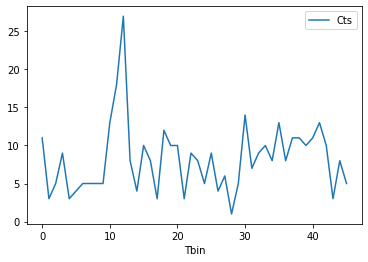

In [31]:
data.plot()

In [32]:
data.pct_change()

,Cts
Tbin,
0,NaN
1,-0.727273
2,0.666667
3,0.800000
4,-0.666667
5,0.333333
6,0.250000
7,0.000000
8,0.000000


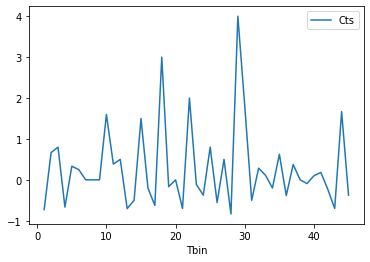

In [33]:
data.pct_change().plot()